In [3]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import string
import nltk

- 1 for negative tweet
- 0 for positive tweet

In [7]:
train = pd.read_csv('../data/train.csv')
train_original = train.copy()
train_original

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [8]:
test = pd.read_csv('../data/test.csv')
test_original = test.copy()
test_original

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [9]:
def remove_pattern(text, pattern):
    r = re.findall(pattern, text)
    for i in r:
        text = re.sub(i, "", text)
    return text

# Preprocessing:
- removing @username
- removing symbols and numbers
- removing any word less than length 3

In [10]:
train['clean_tweets'] = np.vectorize(remove_pattern)(train['tweet'], "@[\w]*")
train['clean_tweets'] = train['clean_tweets'].str.replace("[^a-zA-Z#]", " ")
train['clean_tweets'] = train['clean_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
train

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu?ððððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwaves trying wrap herself mantl...
31959,31960,0,listening to sad songs on a monday morning otw...,listening songs monday morning work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised #calgary, #wso condemns"


# Tokenization

In [11]:
tokenize_tweet = train['clean_tweets'].apply(lambda x: x.split())
tokenize_tweet

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, can't, cause, they, do...
2                                  [bihday, your, majesty]
3        [#model, love, take, with, time, urð±!!!, ð...
4                      [factsguide:, society, #motivation]
                               ...                        
31957    [that, youuu?ððððððððð...
31958    [nina, turner, airwaves, trying, wrap, herself...
31959            [listening, songs, monday, morning, work]
31960    [#sikh, #temple, vandalised, #calgary,, #wso, ...
31961                                      [thank, follow]
Name: clean_tweets, Length: 31962, dtype: object

# Stemming

In [12]:
from nltk import PorterStemmer
ps = PorterStemmer()
tokenize_tweet = tokenize_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenize_tweet

0        [when, father, dysfunct, selfish, drag, kid, i...
1        [thank, #lyft, credit, can't, caus, they, don'...
2                                  [bihday, your, majesti]
3        [#model, love, take, with, time, urð±!!!, ð...
4                           [factsguide:, societi, #motiv]
                               ...                        
31957    [that, youuu?ððððððððð...
31958    [nina, turner, airwav, tri, wrap, herself, man...
31959                   [listen, song, monday, morn, work]
31960    [#sikh, #templ, vandalis, #calgary,, #wso, con...
31961                                      [thank, follow]
Name: clean_tweets, Length: 31962, dtype: object

In [13]:
train['clean_tweets'] = [' '.join(i) for i in tokenize_tweet]
train

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu?ððððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwav tri wrap herself mantl genu...
31959,31960,0,listening to sad songs on a monday morning otw...,listen song monday morn work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #templ vandalis #calgary, #wso condemn"


In [14]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests


In [15]:
all_words_positive = ' '.join(text for text in train['clean_tweets'][train['label'] == 0])

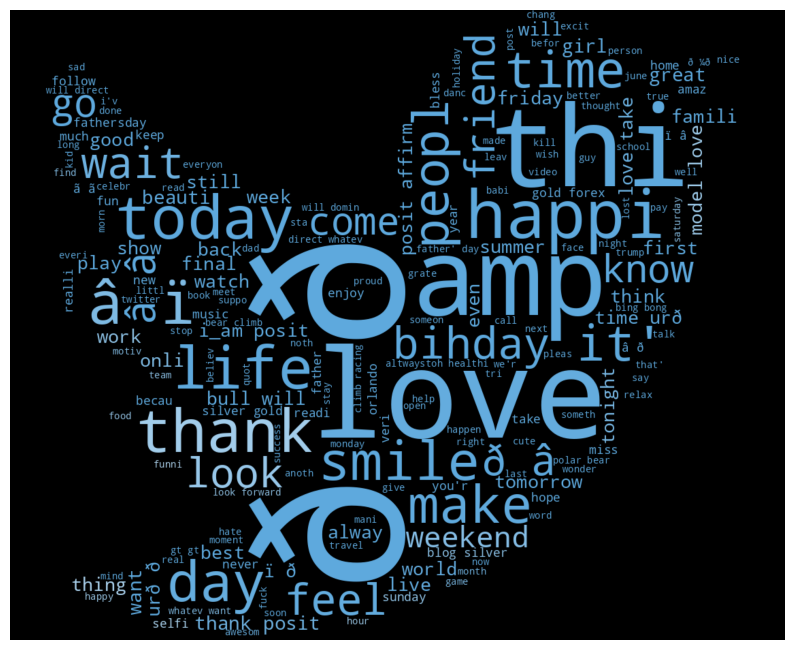

In [16]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color="black", height=1500, width=4000, mask=Mask).generate(all_words_positive)

plt.figure(figsize=(10, 20))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="hamming")
plt.axis('off')
plt.show()

In [17]:
all_words_negative= ' '.join(text for text in train['clean_tweets'][train['label'] == 1])

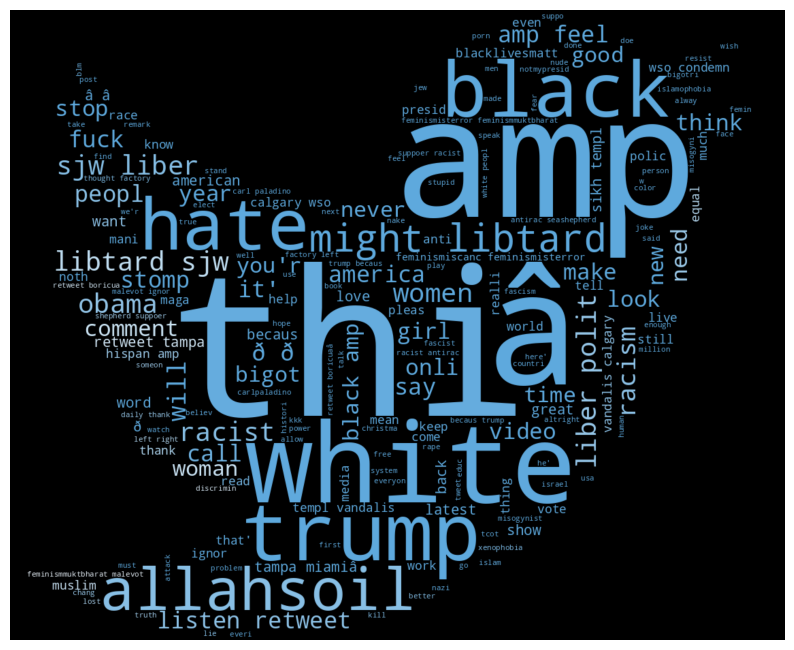

In [18]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color="black", height=1500, width=4000, mask=Mask).generate(all_words_negative)

plt.figure(figsize=(10, 20))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="hamming")
plt.axis('off')
plt.show()

# Extract hashtags and find which hashtag belong to which category

In [19]:
def hashtags_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [20]:
ht_positive = hashtags_extract(train['clean_tweets'][train['label'] ==0])
ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['80day', 'gettingf'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro2016'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift1989'],
 ['traveling

In [22]:
ht_positive_unnest = sum(ht_positive,[])
ht_positive_unnest

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 '80day',
 'gettingf',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro2016',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1989',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop'

In [21]:
ht_negative = hashtags_extract(train['clean_tweets'][train['label'] ==1])
ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'medâ'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golfâ'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 ['â'],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflictâ'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 ['2016'],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatred', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['p21', 'fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'officerâ'],
 [],
 ['black', 'retweet', 'tampa', 'miamiâ'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'r

In [23]:
ht_negative_unnest = sum(ht_negative,[])
ht_negative_unnest

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'medâ',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golfâ',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'â',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflictâ',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 '2016',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'p21',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'officerâ',
 'black',
 'retweet',
 'tampa',
 'miamiâ',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'b

In [24]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)
word_freq_positive

FreqDist({'love': 1576, 'posit': 905, 'smile': 636, 'healthi': 558, 'thank': 526, 'fun': 434, 'affirm': 422, 'life': 399, 'model': 374, 'summer': 362, ...})

In [26]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()), 'Count': list(word_freq_positive.values())})
df_positive

,Hashtags,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374
...,...,...
21734,ucsdâ,1
21735,berlincitygirl,1
21736,zã¼rich,1
21737,genf,1


/home/siddharth/.cache/pypoetry/virtualenvs/twitter-sentiment-analysis-lmOVeSES-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/siddharth/.cache/pypoetry/virtualenvs/twitter-sentiment-analysis-lmOVeSES-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/siddharth/.cache/pypoetry/virtualenvs/twitter-sentiment-analysis-lmOVeSES-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


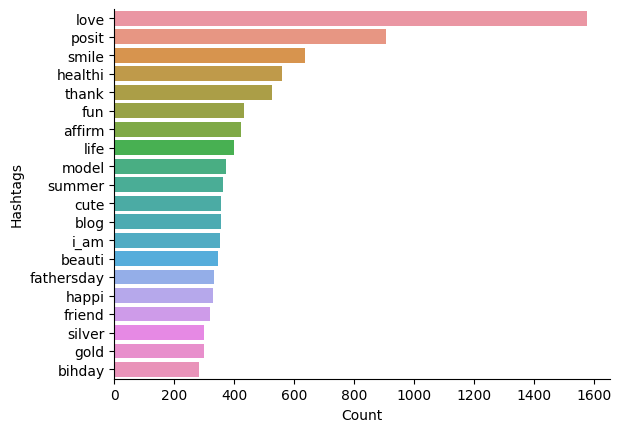

In [27]:
df_positive_plot = df_positive.nlargest(20, columns='Count')
sb.barplot(data=df_positive_plot, y='Hashtags', x='Count')
sb.despine()

In [25]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)
word_freq_negative

FreqDist({'trump': 133, 'polit': 94, 'allahsoil': 92, 'liber': 79, 'libtard': 77, 'sjw': 75, 'retweet': 57, 'black': 46, 'miamiâ': 38, 'hate': 36, ...})

In [28]:
df_negative = pd.DataFrame({"Hashtags": list(word_freq_negative.keys()), "Count": list(word_freq_negative.values())})
df_negative

,Hashtags,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2
...,...,...
1894,jumpedtheshark,1
1895,freemilo,5
1896,milo,4
1897,mailboxprid,1


/home/siddharth/.cache/pypoetry/virtualenvs/twitter-sentiment-analysis-lmOVeSES-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/siddharth/.cache/pypoetry/virtualenvs/twitter-sentiment-analysis-lmOVeSES-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/siddharth/.cache/pypoetry/virtualenvs/twitter-sentiment-analysis-lmOVeSES-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


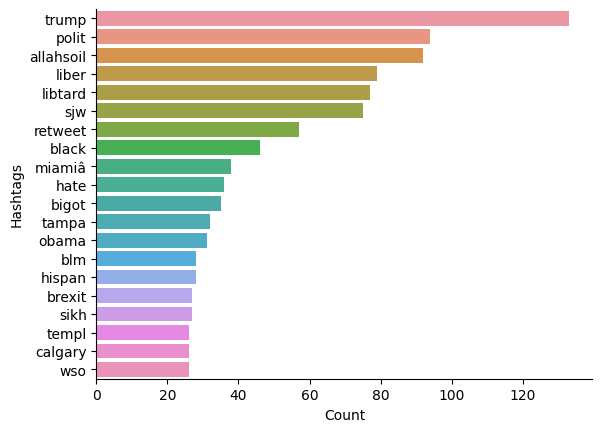

In [29]:
df_negative_plot = df_negative.nlargest(20, columns='Count')
sb.barplot(data=df_negative_plot, y='Hashtags', x='Count')
sb.despine()

In [30]:
# Bag of words

from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train['clean_tweets'])
df_bow = pd.DataFrame(bow.todense())
df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(train['clean_tweets'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
split_length = len(train['label'])
train_bow = bow[:split_length]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [37]:
train_tfidf_matrix = tfidf_matrix[:split_length]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
from sklearn.model_selection import train_test_split
x_train_bow, x_val_bow, y_train_bow, y_val_bow = train_test_split(train_bow, train['label'], test_size=0.3, random_state=1)
x_train_tfidf, x_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(train_tfidf_matrix, train['label'], test_size=0.3, random_state=1)


In [39]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=1, solver='lbfgs')

log_reg.fit(x_train_bow, y_train_bow)
prediction_bow = log_reg.predict_proba(x_val_bow)
prediction_bow

array([[0.99382386, 0.00617614],
       [0.97221508, 0.02778492],
       [0.99799194, 0.00200806],
       ...,
       [0.92869557, 0.07130443],
       [0.96030591, 0.03969409],
       [0.84195954, 0.15804046]])

In [41]:
prediction_int = prediction_bow[:, 1]>=0.3
prediction_int=prediction_int.astype(int)
prediction_int

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
log_bow = f1_score(y_val_bow, prediction_int)
log_bow

0.542314335060449

In [45]:
log_reg.fit(x_train_tfidf, y_train_tfidf)
prediction_tdidf = log_reg.predict_proba(x_val_tfidf)
prediction_tdidf

array([[0.98754189, 0.01245811],
       [0.97462052, 0.02537948],
       [0.98695989, 0.01304011],
       ...,
       [0.92683068, 0.07316932],
       [0.94807706, 0.05192294],
       [0.85045814, 0.14954186]])

In [46]:
prediction_int = prediction_tdidf[:, 1]>=0.3
prediction_int = prediction_int.astype(int)
prediction_int

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
log_tfidf = f1_score(y_val_tfidf, prediction_int)
log_tfidf

0.5509300265721878

In [49]:
from xgboost import XGBClassifier

xg_bow = XGBClassifier(random_state=22, learning_rate=0.9)
xg_bow.fit(x_train_bow, y_train_bow)
xgb = xg_bow.predict_proba(x_val_bow)
xgb

/home/siddharth/.cache/pypoetry/virtualenvs/twitter-sentiment-analysis-lmOVeSES-py3.10/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


array([[0.9939331 , 0.0060669 ],
       [0.9836341 , 0.01636586],
       [0.9943017 , 0.00569829],
       ...,
       [0.93892163, 0.06107839],
       [0.96693516, 0.03306486],
       [0.8663742 , 0.13362579]], dtype=float32)

In [50]:
xgb = xgb[:, 1]>=0.3
xgb_int = xgb.astype(int)
xgb_bow = f1_score(y_val_bow, xgb_int)
xgb_bow

0.5537459283387622

In [51]:
xg_bow.fit(x_train_tfidf, y_train_tfidf)
xgb = xg_bow.predict_proba(x_val_tfidf)
xgb

/home/siddharth/.cache/pypoetry/virtualenvs/twitter-sentiment-analysis-lmOVeSES-py3.10/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


array([[0.99887073, 0.00112925],
       [0.9790842 , 0.02091582],
       [0.9929034 , 0.00709662],
       ...,
       [0.99248725, 0.00751275],
       [0.92847556, 0.07152443],
       [0.8645303 , 0.13546966]], dtype=float32)

In [52]:
xgb = xgb[:, 1]>=0.3
xgb_int = xgb.astype(int)
xgb_bow = f1_score(y_val_tfidf, xgb_int)
xgb_bow

0.5454545454545455

In [53]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(criterion='entropy', random_state=1)
dct.fit(x_train_bow, y_train_bow)
dct_bow = dct.predict_proba(x_val_bow)
dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [54]:
dct_bow = dct_bow[:, 1]>=0.3
dct_int = dct_bow.astype(int)
dct_bow_score = f1_score(y_val_bow, dct_int)
dct_bow_score

0.44522554188635033

In [56]:
dct.fit(x_train_tfidf,y_train_tfidf)
dct_tfidf = dct.predict_proba(x_val_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [59]:
# dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(int)

# calculating f1 score
dct_score_tfidf=f1_score(y_val_tfidf,dct_int_tfidf)

dct_score_tfidf

0.49323786793953855